In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

umsatz = pd.read_csv("umsatzdaten_gekuerzt.csv")
kiwo = pd.read_csv("kiwo.csv")
wetter = pd.read_csv("wetter.csv")

umsatz.head(), kiwo.head(), wetter.head()
umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])



In [4]:
umsatz['Datum'] = pd.to_datetime(umsatz['Datum'])
kiwo['Datum'] = pd.to_datetime(kiwo['Datum'])
wetter['Datum'] = pd.to_datetime(wetter['Datum'])


In [5]:
df = (
    umsatz
    .merge(kiwo, on="Datum", how="left")
    .merge(wetter, on="Datum", how="left")
)

df.head()


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0
1,1307021,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN
2,1307031,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0
3,1307041,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0
4,1307051,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN


In [6]:
# Moving average of sales (7 days)
df["Umsatz_MA7"] = df["Umsatz"].rolling(7).mean()

# Percent change of sales
df["Umsatz_PctChange"] = df["Umsatz"].pct_change()

# Lag feature (sales from previous day)
df["Umsatz_Lag1"] = df["Umsatz"].shift(1)

# Day of week
df["Wochentag"] = df["Datum"].dt.day_name()


In [7]:
df.head(10)


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Umsatz_MA7,Umsatz_PctChange,Umsatz_Lag1,Wochentag
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0,NaN,NaN,NaN,Monday
1,1307021,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN,NaN,0.073678,148.828353,Tuesday
2,1307031,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0,NaN,-0.299812,159.793757,Wednesday
3,1307041,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0,NaN,0.509264,111.885594,Thursday
4,1307051,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN,NaN,0.014306,168.864941,Friday
5,1307061,2013-07-06,1,174.552360,NaN,0.0,18.9625,8.0,NaN,NaN,0.019101,171.280754,Saturday
6,1307071,2013-07-07,1,92.637755,NaN,0.0,21.3750,9.0,NaN,146.834788,-0.469284,174.552360,Sunday
7,1307081,2013-07-08,1,135.500244,NaN,0.0,22.7250,10.0,5.0,144.930772,0.462689,92.637755,Monday
8,1307091,2013-07-09,1,136.048383,NaN,0.0,23.2750,8.0,NaN,141.538576,0.004045,135.500244,Tuesday
9,1307101,2013-07-10,1,135.132314,NaN,2.0,19.6875,13.0,5.0,144.859536,-0.006733,136.048383,Wednesday


In [8]:
df.describe()


,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Umsatz_MA7,Umsatz_PctChange,Umsatz_Lag1
count,9.334000e+03,9334,9334.000000,9334.000000,223.0,9264.000000,9318.000000,9318.000000,7009.000000,9328.000000,9333.000000,9333.000000
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,1.0,4.720747,12.028483,10.974780,36.900128,206.813571,0.064962,206.767450
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,1.0,0.000000,-8.475000,3.000000,0.000000,28.664341,-0.867785,7.051201
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,1.0,3.000000,6.237500,8.000000,10.000000,101.267192,-0.151985,96.988463
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,1.0,6.000000,11.625000,10.000000,28.000000,154.189381,0.014389,161.932438
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,1.0,7.000000,17.962500,13.000000,61.000000,290.125763,0.202669,280.656911
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,1.0,8.000000,31.437500,35.000000,95.000000,746.064991,5.892750,1879.461831
std,1.512503e+05,NaN,1.489002,144.545189,0.0,2.646273,7.232829,4.131974,27.095884,131.774691,0.411812,144.541995


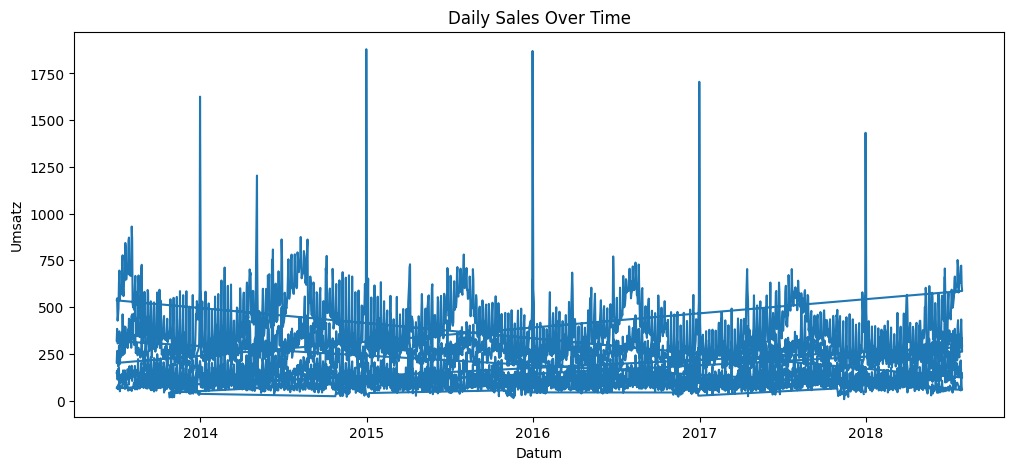

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df["Datum"], df["Umsatz"])
plt.title("Daily Sales Over Time")
plt.xlabel("Datum")
plt.ylabel("Umsatz")
plt.show()


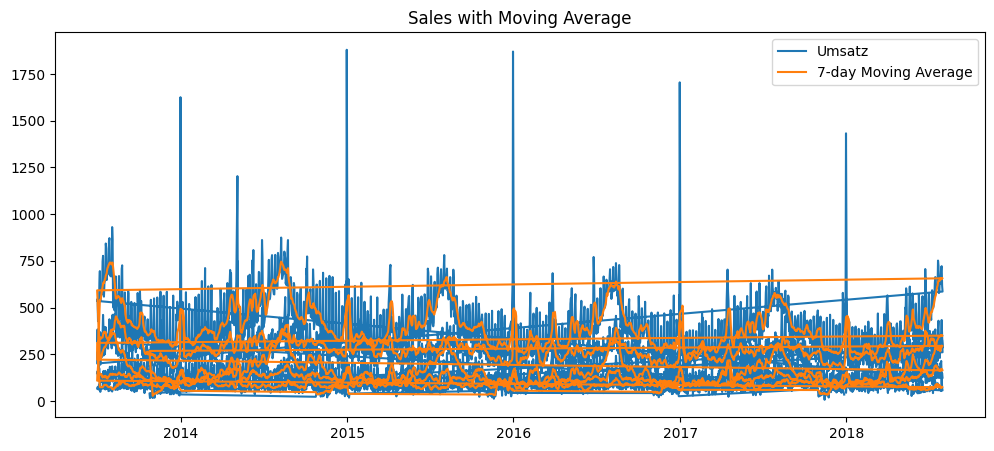

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df["Datum"], df["Umsatz"], label="Umsatz")
plt.plot(df["Datum"], df["Umsatz_MA7"], label="7-day Moving Average")
plt.legend()
plt.title("Sales with Moving Average")
plt.show()


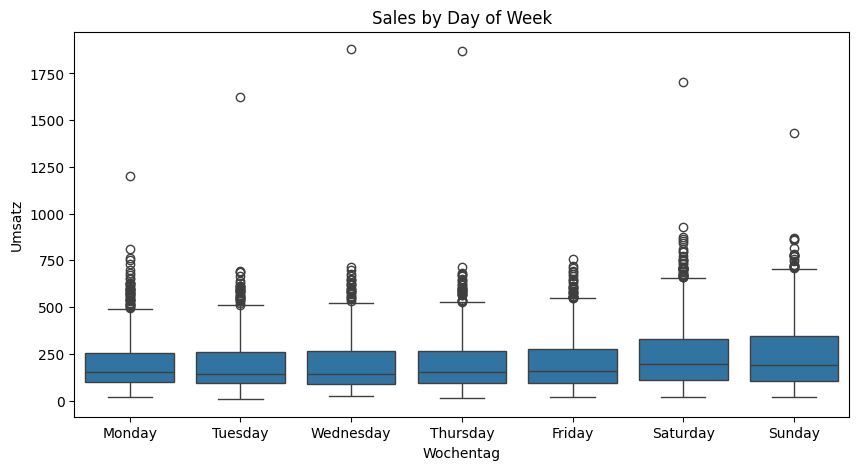

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Wochentag", y="Umsatz")
plt.title("Sales by Day of Week")
plt.show()


In [14]:
df.to_csv("final_dataset.csv", index=False)



import pandas as pd

# — 1. Load your data and Kaggle test data —  
df_main = pd.read_csv("final_dataset.csv", parse_dates=["Datum"])  
df_test_kaggle = pd.read_csv("test.csv", parse_dates=["Datum"])  

# Optionally: inspect  
print("Main data rows:", len(df_main))  
print("Kaggle test rows:", len(df_test_kaggle))  

# — 2. Merge — assuming both dataframes share same columns (or subset)  
df = pd.concat([df_main, df_test_kaggle], ignore_index=True)  

# — 3. Sort by date (just in case)  
df = df.sort_values(by="Datum").reset_index(drop=True)  

# — 4. Feature engineering — time-based and lag/rolling features  
df["Umsatz_MA7"] = df["Umsatz"].rolling(7).mean()  
df["Umsatz_PctChange"] = df["Umsatz"].pct_change()  
df["Umsatz_Lag1"] = df["Umsatz"].shift(1)

# date-related features  
df["month"] = df["Datum"].dt.month  
df["dayofweek"] = df["Datum"].dt.dayofweek  # Monday=0 … Sunday=6  
df["is_weekend"] = df["dayofweek"].isin([5,6]).astype(int)

# — 5. Split into train / val / test by date  
train = df[(df["Datum"] >= "2013-07-01") & (df["Datum"] <= "2017-07-31")]  
val   = df[(df["Datum"] >= "2017-08-01") & (df["Datum"] <= "2018-07-31")]  
test  = df[(df["Datum"] >= "2018-08-01") & (df["Datum"] <= "2019-07-31")]  

# — 6. Verify that test IDs match Kaggle test IDs exactly  
ids_kaggle = set(df_test_kaggle["id"])  
ids_test = set(test["id"])  

if ids_kaggle != ids_test:  
    missing = ids_kaggle - ids_test  
    extra   = ids_test - ids_kaggle  
    raise ValueError(f"Test split IDs mismatch! missing={missing}, extra={extra}")

else:  
    print("Test IDs match Kaggle test IDs exactly – good to go!")


# — 7. Save to CSVs if all good  
train.to_csv("train_prepared.csv", index=False)  
val.to_csv("val_prepared.csv",   index=False)  
test.to_csv("test_prepared.csv", index=False)  

print("Saved train / val / test splits with extra features.")



Main data rows: 9334
Kaggle test rows: 1830
Test IDs match Kaggle test IDs exactly – good to go!
Saved train / val / test splits with extra features.


C:\Users\User\AppData\Local\Temp\ipykernel_17932\3309774066.py:23: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Umsatz_PctChange"] = df["Umsatz"].pct_change()
